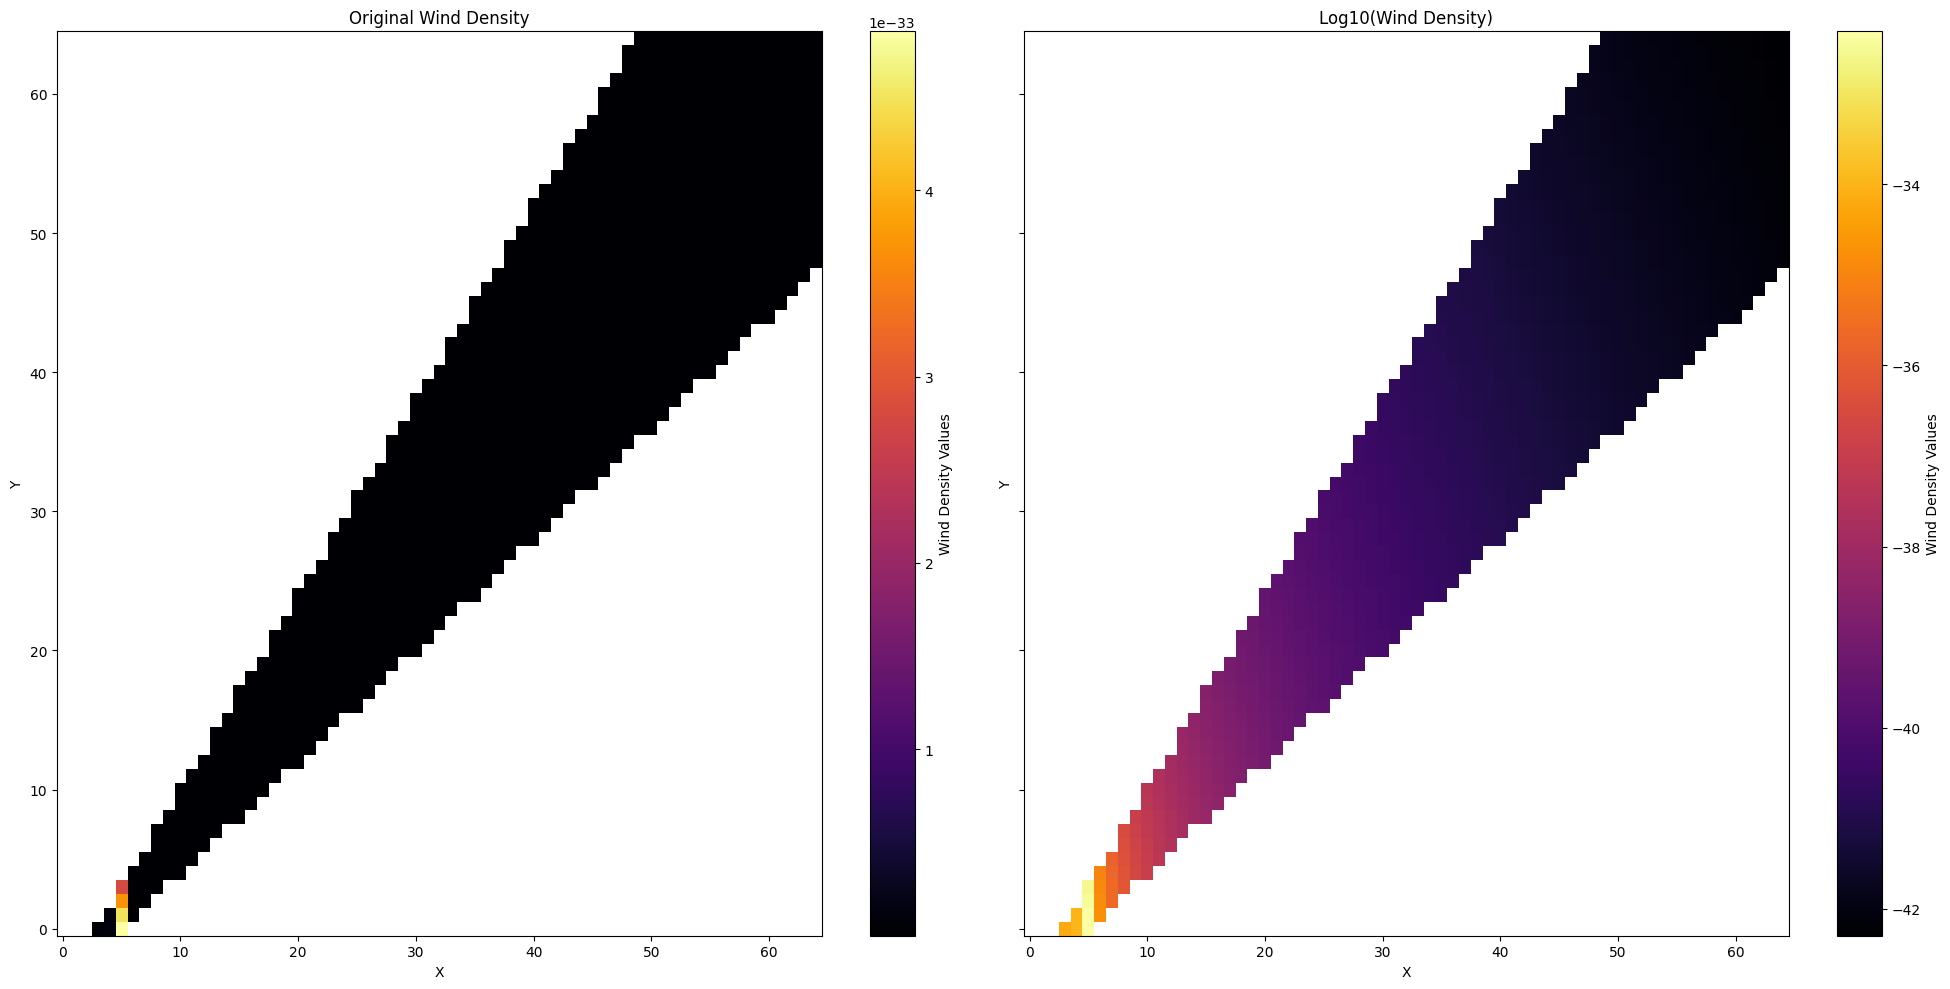

In [4]:
import numpy as np
import matplotlib.pyplot as plt

wind_density_data = np.loadtxt('parameters/wind_density_output.csv', delimiter=',')
log_wind_density_data = np.log10(wind_density_data + 1e-50) 


x_range = np.linspace(0, wind_density_data.shape[1] - 1, wind_density_data.shape[1])
y_range = np.linspace(0, wind_density_data.shape[0] - 1, wind_density_data.shape[0])
X, Y = np.meshgrid(x_range, y_range)

m1, c1 = 1.4, -4
m2, c2 = 0.8, -4
x_line = np.linspace(0, 63, 100) 
line1_y = m1 * X + c1
line2_y = m2 * X + c2
mask = np.logical_or(Y < np.minimum(line1_y, line2_y), Y > np.maximum(line1_y, line2_y))

wind_density_data_masked = np.ma.array(wind_density_data, mask=mask)
log_wind_density_data_masked = np.ma.array(log_wind_density_data, mask=mask)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharey=True)

# masking data
for ax, data, title in zip(axes, [wind_density_data_masked, log_wind_density_data_masked], ['Original Wind Density', 'Log10(Wind Density)']):
    pcm = ax.pcolormesh(X, Y, data, shading='auto', cmap='inferno')
    fig.colorbar(pcm, ax=ax, label='Wind Density Values')
    #ax.plot(x_line, y_line1, 'w-')
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_facecolor('white') 

plt.tight_layout()
plt.savefig('plot.png', dpi=300, format='png')
plt.show()
